# Tutorial: Preprocessing Deep Learning Input from RNA Strings

# 1. Why bother with RNA properties prediction?

RNA Technology is now a new promising hope in Health Science. In addtion to the global-scaled use of COVID19 mRNA-vaccines from BioNTech/Pfizer and Moderna, RNA drugs also provides [a new hint on how to cure important disease such as cancers](https://jhoonline.biomedcentral.com/articles/10.1186/s13045-020-00951-w).

Serious learners about RNA should take this [amazing course](https://www.edx.org/course/introduction-to-biology-the-secret-of-life-3), or just look at this [cute video](https://youtu.be/JQByjprj_mA) (and the others in this channel) if you don't have much time. 

Leading labs including [BioNTech](https://biontech.de/how-we-translate/mrna-therapeutics), [Moderna](https://www.modernatx.com/mrna-technology/mrna-platform-enabling-drug-discovery-development) and [others](https://www.accenttx.com/our-scientific-focus/rmps-and-cancer/) state that RNA-related technology has an important advantage over DNA-technology such that it will not provide a **permanent effects** on a patient, i.e. if we modify our genes in DNA, the modification will permanently embed in the DNA, including any modification mistakes.

In contrast, injected RNA will do its job i.e. making protiens, and then completely disappeared, without leaving any permanent effects. Proteins made by RNA could prevent some
important diseases such as in the case of mRNA vaccines. Intuitively, Moderna compares DNA as a life "hardware" while RNA as a "software" which can be safely injected to human body.

To design RNA drug or vaccine, some properties of RNA must be known. In the past, these properties have to be tested in bio labs which can be time and resource consuming.
Therefore, it is difficult to conduct experiments in a large scale e.g. millions of RNAs. 

Deep learning technology then can help predicting specific properties of millions of RNAs in a flash. Even though, its predictions are not entirely 100% accurate, it can serve as a first filter
for biologists to select most promising samples to further make a small-scale intensive case in the next phase.


## 1.1 About this Tutorial
This interactive tutorial notebook demonstrates how to preprocess RNA data into an input ready to feed into Deep Learning models.
The processed data will be similar to the ones provided by [Kaggle's mRNA OpenVaccine competition](https://www.kaggle.com/c/stanford-covid-vaccine/overview).
So that once you finish processing your own RNA data, you can use any of the [great public codes](https://www.kaggle.com/c/stanford-covid-vaccine/code?competitionId=22111&sortBy=voteCount) 
to make a prediction. We will provide a simplified SOTA top-solution, which will be easily reproducible and adapt to your own work in the near future, so stay tune!!

Figure 1 shows the overall big picture of this notebook. 

Here, we assume that the user has a list of "RNA strings" as input where an RNA string is a string consisting of only 4 characters 'ACGU'.
The true RNA structure of a given string is unknown as can be illustrated in Figure 1 (bottom-left).
The user wants to extract this unknown structure and represents it in the format which is ready-to-use on a Deep Learning model, e.g. a neural network.


In this tutorial, this unknown structure will be estimated using various python and bioinformatics libraries. 
To feed into a deep learning model, the estimated structure will be best represented by "Graph data" $G = (X, E)$ where
each node in the graph corresponding to each character in a string.

Note that this **Graph Representation** generalizes **Sequential Data Representation** so while you can still use well-known
sequential layers/models such as '1D Convolution', 'Transformers' or 'Recurrent Neural Networks', you can also use a new frontier
like 'Graph Neural Networks' which is actually shown effective in this RNA data.

$X$ is a sequence of **node feature vectors**,
and $E$ is an adjacency matrix specifying linkages for each pair of nodes whether the pair is connected in the true structure.

In general, each element in an adjacency matrix can be a real number (e.g. specifying a "probability" whether a pair is connected).
Moreover, there can be more than one adjacency matrices (e.g. differently estimated from various libraries). 

In this general setting of having a list of several adjacency matrices, we will shortly call $E$ as a list of **edge features**.

**Acknowledgement** this tutorial is built on amazing works of many kagglers especially [@its7171](https://www.kaggle.com/its7171/how-to-generate-augmentation-data) and [@group16](https://www.kaggle.com/group16/generating-bpps-with-arnie). However, the URLs and packages used in their notebooks are already outdated. This tutorial fix the problems, ensure complete reproducibility using static Kaggle's dataset, as well as providing full detailed explanation with minimum requirements on the input data.


<!-- ![Data preprocessing from an RNA string](https://i.ibb.co/8mkQ1vh/RNA-data-preprocessing.png) -->
<img src=https://i.ibb.co/8mkQ1vh/RNA-data-preprocessing.png width="1024">
Figure 1. Data preprocessing from an RNA string


## 1.1 Overview of this tutorial

We will assume that users have already list of RNA strings to extract the graph features explained above. Here, we will use Kaggle's OpenVaccine dataset containing 6,000 RNA strings. Note that in OpenVaccine, the dataset already contained some of node and edge features. We will not use them in this tutorial but will show how to extract features even beyond ones in OpenVaccine.

**Node Features.** Each character in an RNA string is represented by its character "A, C, G or U" and its loop-type as shown in Figure 1 "Exterior, Bulge, Stem, Multibranch or Hairpin". We will represent each character by 1-hot vector $R^4$ and will represent the loop-type vector in $R^6$ since there are 6 possible loop types. 

Note that RNA structure can be very complex and have a wide variety as shown in Figure 2.

![](https://i.ibb.co/swD1DBF/rna-folding-examples.png)
Figure 2. RNA can have a variety of structure due to folding.

Therefore, due to complexity of the RNA folding structure, exact loop-type property is unknown (already mentioned in Figure 1), the `CapR` library we used can estimate loop-type probability. Therefore, it will return a probability vector in $R^6$.

Therefore, by concatenating the two vectors, our node features will lies in $R^{10}$. Note that it's certainly possible that to also employ other libraries to extract more node features so that our node-feature vector lies in a higher dimensional than $R^{10}$.


**Edge Features.** Similar to loop-type features, exact link between a pair of nodes is unknown. Therefore, **"base-pair probabilities matrix (bpps)"** is extracted instead. Suppose that an RNA string is length of $N$, bpps then is in $R^{N \times N}$.

This tutorial show how to extract edge features using bpps libraries such as `vienna`, `contrafold` and `rnastructure`. From bpps of these libraries, we can also get "most probable" structure, which can also be further extracted as either node or edge feature.

After the node and edge features are extracted, they can be input directly to deep learning models as shown in Figure 3. The RNA Deep Learning notebook tutorial will be published soon.

<img src=https://i.ibb.co/r3WB24R/RNA-feature-and-model.png width="750">
Figure 3. Extracted feature can be used directly to models such as LSTM, GRU, Transformers and Graph Neural Networks (GNNs)


## 1.2 Install necessary external libraries

As mention above, we will install `CapR`, `vienna`, `contrafold` and `rnastructure` packages to extract node and edge features.
For convenient, We will also install the package called `arnie` which provides a unified interface on all bpps libraries mentioned above.


### Important Note on Kaggle's Docker Version
This kaggle notebook's environment is frozen, not to update to the latest docker version.
The libraries used in this notebook are also stored as Kaggle's dataset and work perfectly in the current frozen environment.

In [1]:
WORKING_DIR = '/kaggle/working/'
TOOLKITS_DIR = '/kaggle/input/rna-data-preprocessing-toolkits'
!ls {TOOLKITS_DIR}
!/opt/conda/bin/python3.7 -m pip install --upgrade pip

CapR					  contrafold-se
RNAstructureLinuxTextInterfaces64bit.tgz  draw_rna_pkg
arnie					  viennarna_2.4.15-1_amd64.deb
bpps
     |████████████████████████████████| 2.1 MB 594 kB/s 
  Attempting uninstall: pip
    Found existing installation: pip 20.2.2
    Uninstalling pip-20.2.2:
      Successfully uninstalled pip-20.2.2


The benefit of using kaggle notebook over alternative notebook such as Colab is the availability of datasets for everybody.
Here, all external libraries are stored in a Kaggle dataset on a path specified by`TOOLKITS_DIR`. Firstly, we install `vienna` package (ref: https://www.tbi.univie.ac.at/RNA/)


In [2]:
!apt-get install {TOOLKITS_DIR}/viennarna_2.4.15-1_amd64.deb -y




Note, selecting 'viennarna' instead of '/kaggle/input/rna-data-preprocessing-toolkits/viennarna_2.4.15-1_amd64.deb'
The following additional packages will be installed:
  libgsl23 libgslcblas0
Suggested packages:
  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html
Recommended packages:
  python-rna perl-rna
The following NEW packages will be installed:
  libgsl23 libgslcblas0 viennarna
0 upgraded, 3 newly installed, 0 to remove and 76 not upgraded.
Need to get 903 kB/4143 kB of archives.
After this operation, 43.2 MB of additional disk space will be used.
Get:1 /kaggle/input/rna-data-preprocessing-toolkits/viennarna_2.4.15-1_amd64.deb viennarna amd64 2.4.15-1 [3240 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgslcblas0 amd64 2.4+dfsg-6 [79.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgsl23 amd64 2.4+dfsg-6 [823 kB]
Fetched 903 kB in 0s (2776 kB/s)
debconf: delaying package configuration, since apt-utils is not installed
Selecti

The `CapR` package is already compiled and executable. It is retrieved from https://github.com/fukunagatsu/CapR

In [3]:
!cp -rf {TOOLKITS_DIR}/CapR/CapR/ .
!chmod 755 ./CapR/CapR

Next, the `arnie` package:   https://github.com/DasLab/arnie

In [4]:
!cp -rf {TOOLKITS_DIR}/arnie/arnie .
!cp -rf {TOOLKITS_DIR}/draw_rna_pkg/draw_rna_pkg .
!cd draw_rna_pkg && python setup.py install

running install
running bdist_egg
running egg_info
writing draw_rna.egg-info/PKG-INFO
writing dependency_links to draw_rna.egg-info/dependency_links.txt
writing top-level names to draw_rna.egg-info/top_level.txt
writing manifest file 'draw_rna.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying draw_rna/draw_utils.py -> build/lib/draw_rna
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/ipynb
copying build/lib/ipynb/__init__.py -> build/bdist.linux-x86_64/egg/ipynb
copying build/lib/ipynb/draw.py -> build/bdist.linux-x86_64/egg/ipynb
creating build/bdist.linux-x86_64/egg/draw_rna
copying build/lib/draw_rna/svg.py -> build/bdist.linux-x86_64/egg/draw_rna
copying build/lib/draw_rna/__init__.py -> build/bdist.linux-x86_64/egg/draw_rna
copying build/lib/draw_rna/draw_all.py -> build/bdist.linux-x86_64/egg/draw_rna
copying build/lib/draw_rna/inv_utils.py -> bui

Next is Stanford's `contrafold` package (ref: http://contra.stanford.edu/contrafold/). Note that it requires `g++4.8` which is not available in the latest Kaggle environment.

In [5]:
!cp -rf {TOOLKITS_DIR}/contrafold-se/contrafold-se .
!apt-get install -y g++-4.8
!sed -i.bak "1 s/^.*$/CXX = g++-4.8/" contrafold-se/src/Makefile
!cd contrafold-se/src; make




The following additional packages will be installed:
  cpp-4.8 gcc-4.8 gcc-4.8-base libasan0 libgcc-4.8-dev libstdc++-4.8-dev
Suggested packages:
  gcc-4.8-locales g++-4.8-multilib gcc-4.8-doc libstdc++6-4.8-dbg
  gcc-4.8-multilib libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg
  libasan0-dbg libtsan0-dbg libquadmath0-dbg libstdc++-4.8-doc
The following NEW packages will be installed:
  cpp-4.8 g++-4.8 gcc-4.8 gcc-4.8-base libasan0 libgcc-4.8-dev
  libstdc++-4.8-dev
0 upgraded, 7 newly installed, 0 to remove and 76 not upgraded.
Need to get 29.3 MB of archives.
After this operation, 73.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-4.8-base amd64 4.8.5-4ubuntu8 [15.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 cpp-4.8 amd64 4.8.5-4ubuntu8 [4368 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libasan0 amd64 4.8.5-4ubuntu8 [63.0 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/univ

Lastly, the`rnastructure` package from https://rna.urmc.rochester.edu/RNAstructure.html

In [6]:
!tar zxvf {TOOLKITS_DIR}/RNAstructureLinuxTextInterfaces64bit.tgz --directory .

RNAstructure/
RNAstructure/oligowalk/
RNAstructure/oligowalk/siRNAWalk.pl
RNAstructure/oligowalk/oligowalk.sln
RNAstructure/oligowalk/example.seq
RNAstructure/oligowalk/example.options
RNAstructure/oligowalk/src/
RNAstructure/oligowalk/src/oligowalk-usage.txt
RNAstructure/oligowalk/src/dg_tem.cpp
RNAstructure/oligowalk/src/interface.h
RNAstructure/oligowalk/src/globals.h
RNAstructure/oligowalk/src/oligowalk.cpp
RNAstructure/oligowalk/src/partitiontotal_inter.cpp
RNAstructure/oligowalk/src/dG_inter.cpp
RNAstructure/oligowalk/src/globals.cpp
RNAstructure/oligowalk/oligowalk.vcproj
RNAstructure/oligowalk/example.rep
RNAstructure/oligowalk/example.ct
RNAstructure/oligowalk/oligowalk.vcxproj.filters
RNAstructure/oligowalk/oligowalk.vcxproj
RNAstructure/oligowalk/README
RNAstructure/oligowalk/example.siRNA
RNAstructure/oligowalk/svm/
RNAstructure/oligowalk/svm/svm_scaler
RNAstructure/oligowalk/svm/prefilter_svm_model
RNAstructure/oligowalk/svm/prefilter_svm_scaler
RNAstructure/oligowalk/svm/

# 2. Feature Extraction

In order to use `arnie` as an interface to all bpps libraries, we need to configure the paths to `arnie.conf` as shown below. After that, we import all necessary packages that will be used in this tutorial.

In [7]:
import os
import glob
import sys

!echo "vienna_2: /usr/bin" > arnie.conf
!echo "contrafold_2: /kaggle/working/contrafold-se/src" >> arnie.conf
!echo "rnastructure: /kaggle/working/RNAstructure/exe" >> arnie.conf
!echo "TMP: /kaggle/working/tmp" >> arnie.conf
!mkdir -p /kaggle/working/tmp
os.environ["ARNIEFILE"] = f"/kaggle/working/arnie.conf"
os.environ["DATAPATH"] = f"/kaggle/working/RNAstructure/data_tables"
sys.path.append('/kaggle/working/draw_rna_pkg/')
sys.path.append('/kaggle/working/draw_rna_pkg/ipynb/')

!cat arnie.conf

vienna_2: /usr/bin
contrafold_2: /kaggle/working/contrafold-se/src
rnastructure: /kaggle/working/RNAstructure/exe
TMP: /kaggle/working/tmp


In [8]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tqdm
import subprocess
from multiprocessing import Pool

# from arnie.pfunc import pfunc
from arnie.mea.mea import MEA
# from arnie.free_energy import free_energy
from arnie.bpps import bpps
# from arnie.mfe import mfe
import arnie.utils as utils



## 2.1 Getting Edge Features

Equpping with packages like `vienna`, `contrafold` and `rnastructure`,`arnie` can be used to extract both bpps matrix and most-probable structure.
Here, we use RNA strings from the OpenVaccine dataset without using any already-extracted-features. 

The readers can easily substitute their own RNA strings to the ones in OpenVaccine by creating a pandas `DataFrame` with two columns of `['id','sequence']`. Note that `id` for each string can be arbitrary -- just make sure to be unique for each string.


In [9]:
debug = True # To extract features of all 6,000 strings, set debug=False

In [10]:
# extract features from all packages and save in corresponding dir
# you can also select only one package
packages = ['contrafold_2', 'vienna_2', 'rnastructure']

train = pd.read_json('../input/stanford-covid-vaccine/train.json', lines=True)
test = pd.read_json('../input/stanford-covid-vaccine/test.json', lines=True)

if debug:
    train = train[:10]
    test = test[:10]
target_df = train.append(test)[['id','sequence']]

print(target_df.shape)
target_df.head(3)

(20, 2)


,id,sequence
0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...
1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...
2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...


As Kaggle notebook provides 4-cores CPU, we will take advantage of the multiprocessing when extracting edge/node features. Here, we creat directory for each selected package separately.

In [11]:
!grep processor /proc/cpuinfo | wc -l
MAX_THREADS = 4
BPPS_DIR = WORKING_DIR+'bpps/'
os.mkdir(BPPS_DIR) # we will store the extracted bpps here

4


In [12]:
for package in packages:
    os.mkdir(BPPS_DIR+package)
!ls {BPPS_DIR}

contrafold_2  rnastructure  vienna_2


The parallel computation can be done easily by applying `imap` from `multiprocessing` package to the specified function, which in our case is the `extract_edge_features` function. `arnie` provides `bpps` and `MEA` function to extract the bpps matrix and most-probable structure, respectively.
The extracted bpps matrix will be saved to Numpy's `.npy` format.

In [13]:
def extract_edge_features(arg):
    sequence, seq_id, package = arg
    
    bp_matrix = bpps(sequence, package=package)
        
    mea_mdl = MEA(bp_matrix)
    np.save(BPPS_DIR+package+f'/{seq_id}.npy', bp_matrix)
    
    return seq_id, sequence, mea_mdl.structure, mea_mdl.score_expected()[2], package


In [14]:
# prepare input for extract_edge_features
arg_list = []
for i, (seq, seq_id) in enumerate(target_df[['sequence','id']].values):
    for pack in packages:
        arg_list.append([seq, seq_id, pack])

# apply multiprocessing to extract_edge_features
p = Pool(processes=MAX_THREADS)
results = []
for ret in tqdm(p.imap(extract_edge_features, arg_list),total=len(arg_list)):
    results.append(ret)
    
structure_df = pd.DataFrame(results, columns=['id', 'sequence', 'structure', 'score', 'package'])

In [15]:
structure_df.head(10)

,id,sequence,structure,score,package
0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.................................................,0.557927,contrafold_2
1,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.......((((.......))))...........................,0.628510,vienna_2
2,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).))................((......,0.698580,rnastructure
3,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,0.892884,contrafold_2
4,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,0.942417,vienna_2
5,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,0.970880,rnastructure
6,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.................................................,0.523437,contrafold_2
7,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,...................................((((......)...,0.580348,vienna_2
8,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,0.873256,rnastructure
9,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,.................................................,0.432161,contrafold_2


 While the most-probable structures of all strings for each package will be stored separately in a `DataFrame`, namely, `structure_df_list` for easy usage. Each element of `structure_df_list` corresponds to one package as shown below.

In [16]:
structure_df_list = []
for package in packages:
    structure_df_list.append(structure_df[structure_df['package']==package])
    print(structure_df_list[-1].shape)


(20, 5)
(20, 5)
(20, 5)


Now, we can investigate the resulted most-probable structure for each string here! The structure is encoded in [a **Dot-Bracket** format](https://www.tbi.univie.ac.at/RNA/ViennaRNA/doc/html/rna_structure_notations.html). The Dot-Bracket notation as introduced in the early times of the ViennaRNA Package denotes base pairs by matching pairs of pair () and unpaired nucleotides by dots. Note that most probable structures of the same id but different packages may not be the same.

In [17]:
for i, package in enumerate(packages):
    print(structure_df_list[i].head(3))

             id                                           sequence  \
0  id_001f94081  GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...   
3  id_0049f53ba  GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...   
6  id_006f36f57  GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...   

                                           structure     score       package  
0  .................................................  0.557927  contrafold_2  
3  .....(((((((((((((((((((((((....)))))))))).)))...  0.892884  contrafold_2  
6  .................................................  0.523437  contrafold_2  
             id                                           sequence  \
1  id_001f94081  GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...   
4  id_0049f53ba  GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...   
7  id_006f36f57  GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...   

                                           structure     score   package  
1  .......((((.......))))......................

If the above print() command is not so intutive, we can also visualize the most-probable structure easily  🤩, even though we won't use the visualization in our feature extraction procedure.

GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUAACUGGAAUAACCCAUACCAGCAGUUAGAGUUCGCUCUAACAAAAGAAACAACAACAACAAC
....................................................................(((((((....))))))).....................


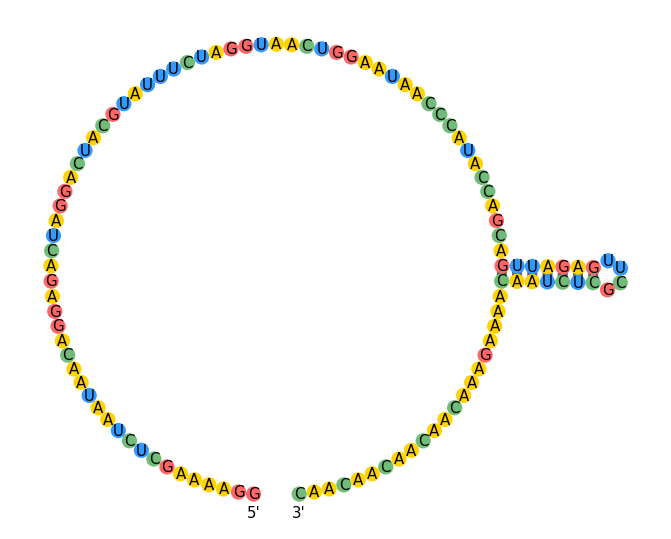

In [18]:
from draw import draw_struct
sequence, structure = structure_df.iloc[0][['sequence', 'structure']]
print(sequence)
print(structure)
draw_struct(sequence, structure,  cmap='plasma')

In [19]:
# Finally, let us investigate the saved bpps files
for i, package in enumerate(packages):
    print(package)
    !ls {BPPS_DIR}{package} | wc
    !ls {BPPS_DIR}{package} | head

contrafold_2
     20      20     340
id_00073f8be.npy
id_000ae4237.npy
id_00131c573.npy
id_00181fd34.npy
id_001f94081.npy
id_0020473f7.npy
id_002852873.npy
id_0031191b7.npy
id_003ab2445.npy
id_0049f53ba.npy
vienna_2
     20      20     340
id_00073f8be.npy
id_000ae4237.npy
id_00131c573.npy
id_00181fd34.npy
id_001f94081.npy
id_0020473f7.npy
id_002852873.npy
id_0031191b7.npy
id_003ab2445.npy
id_0049f53ba.npy
rnastructure
     20      20     340
id_00073f8be.npy
id_000ae4237.npy
id_00131c573.npy
id_00181fd34.npy
id_001f94081.npy
id_0020473f7.npy
id_002852873.npy
id_0031191b7.npy
id_003ab2445.npy
id_0049f53ba.npy


## 2.2 Getting Node Features

Now we will extract one-hot ACGU vector as well as the probabilisttic loop-type vector using `CapR` package. The`CapR` is a shell script command which could be run one string at a time with specified input and output files, and we automate the run in the `run_CapR` function and store the probabilistic output with a pandas' dataframe.


In [20]:
NODE_DIR = WORKING_DIR+'node_features/'
os.mkdir(NODE_DIR)

In [21]:
def run_CapR(rna_id, rna_string, max_seq_len=1024):
    in_file = '%s.fa' % rna_id
    out_file = '%s.out' % rna_id
             
    fp = open(in_file, "w")
    fp.write('>%s\n' % rna_id)
    fp.write(rna_string)
    fp.close()
    
    subprocess.run('/kaggle/working/CapR/CapR %s %s %d' % (in_file, out_file, max_seq_len),
                   shell=True,capture_output=False)
             
    df = pd.read_csv(out_file, skiprows=1,
                     header=None, delim_whitespace=True,
            )
    df2 = df.T[1:]
    df2.columns = df.T.iloc[0].values
    
    return df2

We can test run the function just to have fun :)

In [22]:
test_string = 'AGGGUUUUCCCC'
df = run_CapR('test_id_1234',test_string )
df.head(len(test_string ))

,Bulge,Exterior,Hairpin,Internal,Multibranch,Stem
1,0,0.999999,0,0,0,1.08368e-06
2,3.51536e-10,0.00773274,4.72559e-07,0,0,0.992267
3,1.32654e-05,0.00285747,0.000320406,1.09517e-05,0,0.996798
4,0,0.00282882,0.0619287,0,0,0.935242
5,0,0.00282882,0.997171,0,0,6.32224e-08
6,0,0.00282888,0.997171,0,0,3.91568e-07
7,3.51536e-10,0.0028291,0.99717,0,0,1.37588e-06
8,1.93061e-08,0.00282978,0.99566,0,0,0.00150992
9,3.3393e-06,0.00283134,0.161654,1.03792e-07,0,0.835511
10,0.00048914,0.00289224,0.00716014,9.67593e-06,0,0.989449


Next, `extract_rna_node_features` will combine the above `run_CapR` with one-hot 'AGUC' vector. We also can have the most-probable structure in DotBracket notation as one-hot vector as an additional option to node features. This `extract_rna_node_features` will save a `.csv` file for each string in the `NODE_DIR` directory

In [23]:
def extract_rna_node_features(rna_id, rna_string, mfe_structure=None):
    # looptype features
    df = run_CapR(rna_id, rna_string)
    
    # onehot AGCU features
    def onehot_np(length, i):
        vect = [0] * length
        vect[i] = 1
        return np.array(vect)
    
    base_vocab = 'ACGU'
    token2onehot = {x:onehot_np(len(base_vocab), i) for i, x in enumerate(base_vocab)}
    out = list(map(lambda y : token2onehot[y], rna_string))
    df[list(base_vocab)] = np.array(out)
    
    # onehot mfe_structure features (optional)
    if mfe_structure is not None:
        structure_vocab = '(.)'
        token2onehot = {x:onehot_np(len(structure_vocab), i) for i, x in enumerate(structure_vocab)}
        out = list(map(lambda y : token2onehot[y], mfe_structure))
        df[list(structure_vocab)] = np.array(out)
    
    return df

Run for another fun to see the complete sequence of node features for each character 🚀 💥 🚀!! 

In [24]:
rna_id = 'testmol'
rna_string = 'AGGGGCCUUUUAAGGAAUUUC'
struct_string = '(.................)()'

df = extract_rna_node_features(rna_id, rna_string, struct_string)
print(df.shape)
df.head(10)

(21, 13)


,Bulge,Exterior,Hairpin,Internal,Multibranch,Stem,A,C,G,U,(,.,)
1,0,0.721379,0,0,0,0.278621,1,0,0,0,1,0,0
2,0.000246423,0.420411,1.54179e-05,0.00563558,2.49689e-09,0.573691,0,0,1,0,0,1,0
3,3.47289e-05,0.326347,0.00704892,0.103695,1.06177e-07,0.562873,0,0,1,0,0,1,0
4,1.41643e-05,0.322814,0.00735739,0.6074,1.82353e-07,0.0624141,0,0,1,0,0,1,0
5,4.15321e-06,0.322418,0.00748593,0.580503,2.56161e-07,0.0895893,0,0,1,0,0,1,0
6,0.000314452,0.0272247,0.00777131,0.00334634,2.01279e-08,0.961343,0,1,0,0,0,1,0
7,0.000333433,0.0221736,0.00777751,0.000799619,1.76893e-09,0.968916,0,1,0,0,0,1,0
8,0.000383505,0.0242433,0.30224,0.000116265,1.12233e-07,0.673017,0,0,0,1,0,1,0
9,1.44264e-05,0.0282549,0.967996,3.01338e-05,4.44128e-08,0.00370413,0,0,0,1,0,1,0
10,3.51827e-06,0.028279,0.97016,1.65546e-05,1.71981e-08,0.00154111,0,0,0,1,0,1,0


Now we make a simple function to allow parallelization and save the resulted node features into an individual dataframe. Note that here, use only 1 most-probable structure from the first package to make a feature, but the reader can extend to include structures from all packages easily

In [25]:
def extract_rna_node_features_and_save(arg):
    rna_id = arg[0]
    rna_string = arg[1]
    struct_string = arg[2]

    df = extract_rna_node_features(rna_id, rna_string, struct_string)
    df.to_csv(NODE_DIR+'%s_node_features.csv' % rna_id, index=False)
    
    return 0

In [26]:
arg_list = []

for i, (seq_id, sequence, structure) in enumerate(structure_df_list[0][['id','sequence','structure']].values):
#     for pack in packages:
    arg_list.append([seq_id, sequence, structure])
            
p = Pool(processes=MAX_THREADS)

for ret in tqdm(p.imap(extract_rna_node_features_and_save, arg_list),total=len(arg_list)):
    pass # we save the output to files

Node-feature extraction is done ☄️ 💥 🔥 !!

In [27]:
# investigate the save bpps files
!ls {NODE_DIR} | wc
!ls {NODE_DIR} | head

     20      20     620
id_00073f8be_node_features.csv
id_000ae4237_node_features.csv
id_00131c573_node_features.csv
id_00181fd34_node_features.csv
id_001f94081_node_features.csv
id_0020473f7_node_features.csv
id_002852873_node_features.csv
id_0031191b7_node_features.csv
id_003ab2445_node_features.csv
id_0049f53ba_node_features.csv


# (Optional) 3. Advanced Node-Feature Extraction

We are done, but what else? We can actually go beyond to explore some feature engineering like SOTA [models](https://www.kaggle.com/group16/covid-19-mrna-4th-place-solution), which also was inspried by [this](https://www.kaggle.com/its7171/gru-lstm-with-feature-engineering-and-augmentation) and this [notebooks](https://www.kaggle.com/its7171/dangerous-features). Yes, SOTA models were those who got gold medals in the very-intense OpenVaccine competition!

Advanced node features that we are going to extract further in this section are

* The ratio of Dot-Bracket prediction `'(', '.',` and `')'` predicted by 3 packages (`vienna`, `contrafold` and `rnastructure`) -- instead of depending only on one package like we did in previous section
* Some of bpps for each base
* Maximum probability with respect to bpps for each base
* Number of non-zeros on bpps for each base
* Codon's (triplet) position for each base which is simply 012012012012... for every RNA string.


In [28]:
# we will save these advanced node features separated from basic node features, so that users can choose either of them
ADV_NODE_DIR = '/kaggle/working/advanced_node_features/'
os.mkdir(ADV_NODE_DIR) 

In [29]:
rna_id_list = structure_df.id.unique()
structure_df.head(2)

,id,sequence,structure,score,package
0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.................................................,0.557927,contrafold_2
1,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.......((((.......))))...........................,0.628510,vienna_2


In [30]:
def str_to_charflag(string, char):
    bin_str = [c==char for c in string]
    return np.array(bin_str).astype(np.int32)

# this function assumes the existent of structure_df built in last section
def make_advanced_features(rna_id,debug=False):
    # first, let us copy the basic features    
    df = pd.read_csv(NODE_DIR+rna_id+'_node_features.csv')
    
    ####
    # Ratio of the open-pair, close-pair and non-pair
    ####
    struct_string_list = structure_df.query('id == @rna_id')['structure'].values
    
    open_pair_list = np.array([str_to_charflag(s, '(') for s in struct_string_list])
    open_pair_ratio = np.mean(open_pair_list, axis=0)
    df['(-ratio'] = open_pair_ratio
    
    close_pair_list = np.array([str_to_charflag(s, ')') for s in struct_string_list])
    close_pair_ratio = np.mean(close_pair_list, axis=0)
    df[')-ratio'] = close_pair_ratio
    
    non_pair_list = np.array([str_to_charflag(s, '.') for s in struct_string_list])
    non_pair_ratio = np.mean(non_pair_list, axis=0)
    df['.-ratio'] = non_pair_ratio
    
    ####
    # Codon positioning feature (trinary)
    ####
    rna_len = len(struct_string_list[0])
    codon_pos0 = (np.arange(rna_len) % 3 == 0).astype(np.int32)
    codon_pos1 = (np.arange(rna_len) % 3 == 1).astype(np.int32)
    codon_pos2 = (np.arange(rna_len) % 3 == 2).astype(np.int32)
    df['codon-pos0'] = codon_pos0
    df['codon-pos1'] = codon_pos1
    df['codon-pos2'] = codon_pos2
    
    ####
    # bpps feat. engineering
    ####
    bpps_list = []
    for i, package in enumerate(packages):
        bpps_list.append(np.load(BPPS_DIR+package+f'/{rna_id}.npy'))
    bpps = np.mean(bpps_list, axis=0)
    
    df['bpps-max'] = np.max(bpps,axis=0)
    df['bpps-sum'] = np.sum(bpps,axis=0)
    df['bpps-num-ratio'] = np.sum(bpps==0, axis=0)/bpps.shape[0]
    
    df.to_csv(ADV_NODE_DIR+'%s_node_features.csv' % rna_id, index=False)
    
    if debug:
        return df
    return 0

df = make_advanced_features(rna_id_list[0], debug=True)
print(df.shape)
df.head(25)

(107, 22)


,Bulge,Exterior,Hairpin,Internal,Multibranch,Stem,A,C,G,U,...,),(-ratio,)-ratio,.-ratio,codon-pos0,codon-pos1,codon-pos2,bpps-max,bpps-sum,bpps-num-ratio
0,0.000000,0.618965,0.000000,0.000000,0.000000,0.381035,0,0,1,0,...,0,0.000000,0.000000,1.000000,1,0,0,0.026483,0.145467,0.598131
1,0.000032,0.471132,0.000167,0.045136,0.190985,0.292548,0,0,1,0,...,0,0.000000,0.000000,1.000000,0,1,0,0.026349,0.125363,0.598131
2,0.000184,0.470539,0.000908,0.078797,0.420182,0.029391,1,0,0,0,...,0,0.000000,0.000000,1.000000,0,0,1,0.022223,0.049443,0.813084
3,0.000719,0.469550,0.003510,0.080420,0.421579,0.024222,1,0,0,0,...,0,0.000000,0.000000,1.000000,1,0,0,0.021769,0.025749,0.813084
4,0.000886,0.462434,0.003542,0.081577,0.420775,0.030787,1,0,0,0,...,0,0.000000,0.000000,1.000000,0,1,0,0.019496,0.026239,0.813084
5,0.002027,0.181498,0.003563,0.039973,0.164014,0.608925,1,0,0,0,...,0,0.333333,0.000000,0.666667,0,0,1,0.352296,0.382721,0.813084
6,0.000131,0.092504,0.003617,0.033511,0.081318,0.788919,0,0,1,0,...,0,0.333333,0.000000,0.666667,1,0,0,0.388726,0.473170,0.607477
7,0.002848,0.009723,0.003390,0.032446,0.005118,0.946475,0,1,0,0,...,0,0.666667,0.000000,0.333333,0,1,0,0.691272,0.769333,0.822430
8,0.000867,0.004836,0.000775,0.027648,0.023786,0.942088,0,0,0,1,...,0,0.666667,0.000000,0.333333,0,0,1,0.700931,0.805981,0.420561
9,0.000621,0.004215,0.001131,0.001906,0.072972,0.919155,0,1,0,0,...,0,0.666667,0.000000,0.333333,1,0,0,0.699819,0.798533,0.822430


In [31]:
p = Pool(processes=MAX_THREADS)

for ret in tqdm(p.imap(make_advanced_features, rna_id_list),total=len(rna_id_list)):
    pass # we save the output to files

In [32]:
# investigate the save bpps files
!ls {ADV_NODE_DIR} | wc
!ls {ADV_NODE_DIR} | head

     20      20     620
id_00073f8be_node_features.csv
id_000ae4237_node_features.csv
id_00131c573_node_features.csv
id_00181fd34_node_features.csv
id_001f94081_node_features.csv
id_0020473f7_node_features.csv
id_002852873_node_features.csv
id_0031191b7_node_features.csv
id_003ab2445_node_features.csv
id_0049f53ba_node_features.csv


# Epilogue: Clean up before finish!!
To be compact, we will zip all the extract features and remove all the packages before leaving.
By this clean up, it will easy to export into another Kaggle's dataset to be used in another Deep-Modeling notebook

This concludes the tutorial; hope it will be useful 🥰 😘!!

In [33]:
structure_df.to_csv('most_probable_structure.csv',index=False)
!zip -r bpps.zip {BPPS_DIR}
!zip -r node_features.zip {NODE_DIR}
!zip -r advanced_node_features.zip {ADV_NODE_DIR}

  adding: kaggle/working/bpps/ (stored 0%)
  adding: kaggle/working/bpps/contrafold_2/ (stored 0%)
  adding: kaggle/working/bpps/contrafold_2/id_001f94081.npy (deflated 81%)
  adding: kaggle/working/bpps/contrafold_2/id_003ab2445.npy (deflated 91%)
  adding: kaggle/working/bpps/contrafold_2/id_00181fd34.npy (deflated 91%)
  adding: kaggle/working/bpps/contrafold_2/id_00ab2d761.npy (deflated 87%)
  adding: kaggle/working/bpps/contrafold_2/id_002852873.npy (deflated 83%)
  adding: kaggle/working/bpps/contrafold_2/id_0051b1d76.npy (deflated 94%)
  adding: kaggle/working/bpps/contrafold_2/id_0020473f7.npy (deflated 97%)
  adding: kaggle/working/bpps/contrafold_2/id_00073f8be.npy (deflated 80%)
  adding: kaggle/working/bpps/contrafold_2/id_000ae4237.npy (deflated 88%)
  adding: kaggle/working/bpps/contrafold_2/id_006f36f57.npy (deflated 76%)
  adding: kaggle/working/bpps/contrafold_2/id_0087940f4.npy (deflated 76%)
  adding: kaggle/working/bpps/contrafold_2/id_00131c573.npy (deflated 88%)
 

In [34]:
!rm -rf CapR/
!rm -r tmp/
!rm -r RNAstructure/
!rm -r arnie/
!rm -r contrafold-se/
!rm -r draw_rna_pkg/
!rm -rf {BPPS_DIR}
!rm -rf {NODE_DIR}
!rm -rf {ADV_NODE_DIR}
!rm arnie.conf

In [35]:
# delete temp files relating CapR
for f in glob.glob("*.fa"):
    os.remove(f)
for f in glob.glob("*.out"):
    os.remove(f)

!ls -h

__notebook__.ipynb	    bpps.zip			 node_features.zip
advanced_node_features.zip  most_probable_structure.csv
